# Tutorial: display Gaia EDR3 sources

This notebook demonstrates that Gaia DR3 sources are shown on the sky.

In [1]:
import matplotlib.pyplot as plt
from warpfield.telescope import SourceTable, get_subplot, display_sources

In [2]:
from astropy.coordinates import SkyCoord, Longitude, Latitude
import astropy.units as u

In [3]:
lon = Longitude(269.267, unit=u.degree)
lat = Latitude(-18.985, unit=u.degree)
pointing = SkyCoord(lon, lat, frame='icrs')

The retrieved Gaia DR3 data are loaded from the pickled file.

In [4]:
table = SourceTable.from_fitsfile('gaia_dr3.fits')
gaia_sources = table.skycoord

Use `display_sources` function. The first argument is the center of the field of view. The second argument is the source list. The x-, and y-coordinates are specified by the coordinate frame of the first argument. Here, `pointing` is defined in the `icrs` frame. The figure is shown in the (RA, Dec) coordinates.

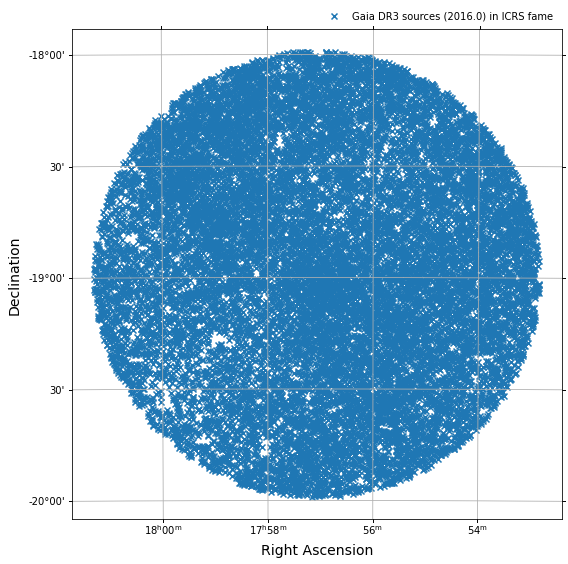

In [5]:
fig,ax = get_subplot(pointing)
ax = display_sources(ax, gaia_sources, title="Gaia DR3 sources (2016.0) in ICRS fame")

When the first argument is given in a different frame, the coordinates of the figure are changed accordingly. The `pointing` is converted into the `galactic` frame in the following example. The figure is shown in the (Glon, Glat) coordinates.

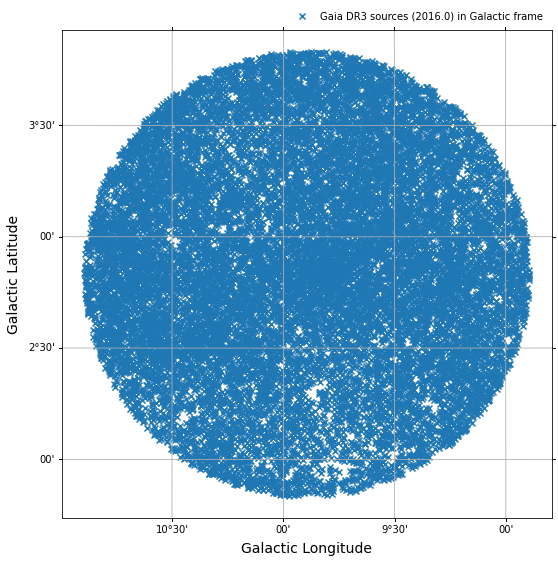

In [6]:
fig,ax = get_subplot(pointing.galactic)
display_sources(ax, gaia_sources, title="Gaia DR3 sources (2016.0) in Galactic frame")